# Test API Ml-Agents

In [2]:
import numpy as np
from mlagents_envs.environment import UnityEnvironment, ActionTuple
from typing import Dict
import matplotlib.pyplot as plt

## Enviroment connection

In [3]:
env = UnityEnvironment(file_name = None, seed=1, side_channels=[])
env.reset()

### Enviroment info

In [4]:
behavior_name = list(env.behavior_specs)[0]
print("Name of the behavior : {}".format(behavior_name))
spec = env.behavior_specs[behavior_name]

# Examine the number of observations per Agent
print("Number of observations : ", len(spec.observation_specs))

# Is there a visual observation ?
# Visual observation have 3 dimensions: Height, Width and number of channels
vis_obs = any(len(spec.shape) == 3 for spec in spec.observation_specs)
print("Is there a visual observation ?", vis_obs)

Name of the behavior : My Behavior?team=0
Number of observations :  2
Is there a visual observation ? True


### Actions space

In [5]:
# Is the Action continuous or multi-discrete ?
if spec.action_spec.continuous_size > 0:
  print(f"There are {spec.action_spec.continuous_size} continuous actions")
if spec.action_spec.is_discrete():
  print(f"There are {spec.action_spec.discrete_size} discrete actions")


# How many actions are possible ?
#print(f"There are {spec.action_size} action(s)")

# For discrete actions only : How many different options does each action has ?
if spec.action_spec.discrete_size > 0:
  for action, branch_size in enumerate(spec.action_spec.discrete_branches):
    print(f"Action number {action} has {branch_size} different options")

There are 3 discrete actions
Action number 0 has 2 different options
Action number 1 has 2 different options
Action number 2 has 2 different options


### Obs. Space

Here is the first visual observation


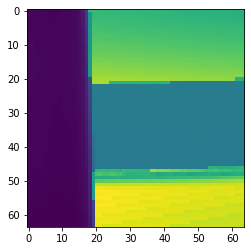

In [6]:
decision_steps, terminal_steps = env.get_steps(behavior_name)

"""
You can set the actions for the Agents of a Behavior by calling env.set_actions() you will need to specify the behavior name and pass a tensor of dimension 2. 
The first dimension of the action must be equal to the number of Agents that requested a decision during the step.
"""
#env.set_actions(behavior_name, spec.action_spec.empty_action(len(decision_steps)))


# Show the img
for index, obs_spec in enumerate(spec.observation_specs):
  if len(obs_spec.shape) == 3:
    print("Here is the first visual observation")
    plt.imshow(decision_steps.obs[index][0,:,:,:])
    plt.show()

Total rewards for episode 0 is 0.09999998658895493
Here is the visual observation nº: 100


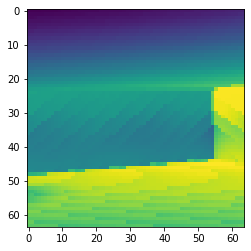

Here is the visual observation nº: 200


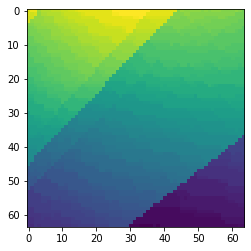

Here is the visual observation nº: 300


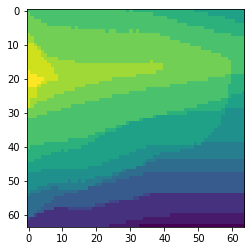

Total rewards for episode 1 is -1.0000000298023224
Total rewards for episode 2 is 1.0


In [7]:
for episode in range(3):
  env.reset()
  decision_steps, terminal_steps = env.get_steps(behavior_name)
  tracked_agent = -1 # -1 indicates not yet tracking
  done = False # For the tracked_agent
  episode_rewards = 0 # For the tracked_agent
  move = 0
  while not done:
    # Track the first agent we see if not tracking
    # Note : len(decision_steps) = [number of agents that requested a decision]
    if tracked_agent == -1 and len(decision_steps) >= 1:
      tracked_agent = decision_steps.agent_id[0]

    # Generate an action for all agents
    action = spec.action_spec.random_action(len(decision_steps))

    # Set the actions
    env.set_actions(behavior_name, action)
    move +=1
    # Move the simulation forward
    env.step()
    
    # print observation
    if move % 100 == 0:
      for index, obs_spec in enumerate(spec.observation_specs):
        if len(obs_spec.shape) == 3:
          print("Here is the visual observation nº: {}".format(move))
          plt.imshow(decision_steps.obs[index][0,:,:,:])
          plt.show()

    # Get the new simulation results
    decision_steps, terminal_steps = env.get_steps(behavior_name)
    if tracked_agent in decision_steps: # The agent requested a decision
      episode_rewards += decision_steps[tracked_agent].reward
    if tracked_agent in terminal_steps: # The agent terminated its episode
      episode_rewards += terminal_steps[tracked_agent].reward
      done = True
  print(f"Total rewards for episode {episode} is {episode_rewards}")

In [8]:
env.close()